<a href="https://colab.research.google.com/github/nv-hiep/dust_scattering/blob/main/extinction_curves_SMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extinction curves within the Small Magellanic Cloud (SMC)**

In WD2001 models:

**Case A: variable grain volumes.**

**Case B: fixed total grain volumes.**

V_total,g = 2.3 x 10^(-27) cm^3 H^(-1)

V_total,g = 3.9 x 10^(-27) cm^3 H^(-1).

# 1. Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [ ]:
cd '/content/gdrive/My Drive/Colab Notebooks/dust'

/content/gdrive/My Drive/Colab Notebooks/dust


# 3. Import Libraries



## 3.1 Standard libraries

In [ ]:
import os
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline  

## 3.2 Dust libraries

In [ ]:
import libs.constants    as c

from libs                import sizedist
from libs.extinction     import scattools

## 4. Set some parameters: dust mass column, energy range, wavelength range

In [ ]:
NH     = 1.e21                                # H column density [H cm^-2]
D2G    = 0.009                                # Dust-to-gas ratio
M_dust = NH * c.M_p * D2G                     # Dust mass column [g cm^-2]

# E_range    = np.logspace(-0.6, 1., 20)      # KeV, slow
E_range    = np.logspace(-3.4, -2., 100)      # KeV
lambda_    = c.HC / E_range                   # [cm]      
lambda_    = lambda_ / c.MICRON2CM            # [micron]
lambda_inv = 1. / lambda_                     # [um^-1]

# 5. Grain scattering models

In [ ]:
RG_Drude     = scattools.create_scat_model('RG','Drude')
Mie_sil      = scattools.create_scat_model('Mie','Silicate')
Mie_gra      = scattools.create_scat_model('Mie','Graphite')
Mie_smallgra = scattools.create_scat_model('Mie','SmallGraphite')


print(RG_Drude.__dict__.keys())
print(type(RG_Drude.scat_model))
print(type(RG_Drude.cmindex_model))

dict_keys(['scat_model', 'cmindex_model', 'scat_type', 'cmindex_type'])
<class 'libs.extinction.scatmodels.RGscat'>
<class 'libs.composition.cmindex.CmDrude'>


# 6. Extinction curves of different grain types, **SMC**

In [ ]:
def plot_ext_curve(ax, kappa_obj, **kwargs):
  yval = 1.086*kappa_obj.kappa * kappa_obj.dist.md / 6.2e-23
  
  if np.all( np.isnan(yval) ):
    yval = np.array( [0.]*len(yval) )
  
  ax.plot(lambda_inv, yval, **kwargs)
  
  return yval

In [ ]:
# SMC, Rv = 2.87, bc = 0.e-5
Rv = 2.87
bc = 0.
SMC_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc, gal='SMC')
SMC_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG', gal='SMC')
SMC_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous', gal='SMC')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=SMC_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=SMC_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=SMC_car)

/content/gdrive/My Drive/Colab Notebooks/dust/libs/extinction/scattools.py:335: RuntimeWarning: invalid value encountered in double_scalars
  kappa = np.append(kappa, utils.xytrapz(dist.a, dist.nd * qext[j,:] * cgeo) / dist.md)


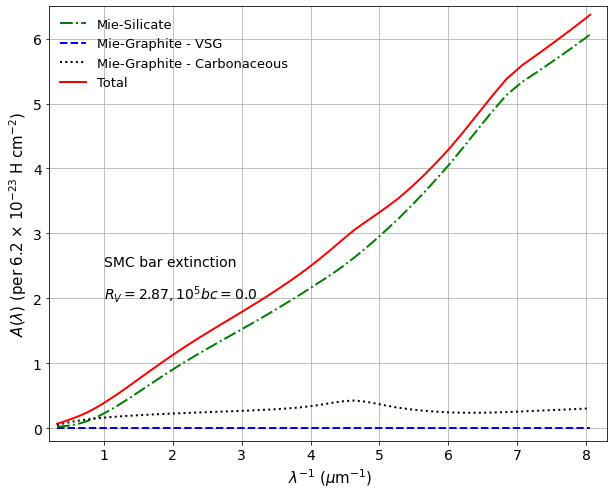

In [ ]:
# Plot extinction curves
plt.figure( figsize=(10,8) )
ax = plt.subplot(111)

y_sil = plot_ext_curve(ax, sil_kappa, ls='-.', color='g', lw=2, alpha=1., label='Mie-Silicate')
y_vsg = plot_ext_curve(ax, vsg_kappa, ls='--', color='b', lw=2, alpha=1., label='Mie-Graphite - VSG')
y_car = plot_ext_curve(ax, car_kappa, ls=':', color='k', lw=2, alpha=1., label='Mie-Graphite - Carbonaceous')

ax.plot(lambda_inv, y_sil+y_vsg+y_car, 'r-', lw=2, alpha=1., label='Total')

ax.text(1., 2., r'$R_V = {0}, 10^5bc = {1}$'.format(Rv, bc), fontsize=14)
ax.text(1., 2.5, 'SMC bar extinction', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r' $\lambda^{-1}$ ($\mu$m$^{-1}$)', size=15)
ax.set_ylabel(r'$A (\lambda)$ (per 6.2 $\times$ 10$^{-23}$ H cm$^{-2}$)', size=15)

plt.legend(loc='upper left', frameon=False, fontsize=13)
# plt.loglog()
plt.xlim(0.2, 8.3)
plt.ylim(-0.2, 6.5)
plt.grid()
plt.show()

# 7. WD01 model extinction curves extended to short wavelengths, for various size distributions.

In [ ]:
# Extinction, A(lambda) / 1.2 x 10^(-22) N_H
def ext_(kappa_obj):
  yval = 1.086*kappa_obj.kappa * kappa_obj.dist.md / 1.2e-22

  if np.all( np.isnan(yval) ):
    yval = np.array( [0.]*len(yval) )
  
  return yval

In [ ]:
NH     = 1.e21                                # H column density [H cm^-2]
D2G    = 0.009                                # Dust-to-gas ratio
M_dust = NH * c.M_p * D2G                     # Dust mass column [g cm^-2]

# E_range    = np.logspace(-0.6, 1., 20)      # KeV, slow
E_range    = np.logspace(-3.4, -1.2, 100)     # KeV
lambda_    = c.HC / E_range                   # [cm]      
lambda_    = lambda_ / c.MICRON2CM            # [micron]
lambda_inv = 1. / lambda_                     # [um^-1]

In [ ]:
# Case 1
Rv = 2.6
bc = 2.
LMC_AVG_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc, gal='LMC', LMCcase='AVG')
LMC_AVG_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG', gal='LMC', LMCcase='AVG')
LMC_AVG_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous', gal='LMC', LMCcase='AVG')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=LMC_AVG_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=LMC_AVG_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=LMC_AVG_car)

y1 = ext_(sil_kappa) + ext_(vsg_kappa) + ext_(car_kappa)


# Case 2
Rv = 2.6
bc = 1.
LMC_AVG_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc, gal='LMC', LMCcase='2')
LMC_AVG_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG', gal='LMC', LMCcase='2')
LMC_AVG_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous', gal='LMC', LMCcase='2')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=LMC_AVG_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=LMC_AVG_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=LMC_AVG_car)

y2 = ext_(sil_kappa) + ext_(vsg_kappa) + ext_(car_kappa)



# Case 3 for SMC
Rv = 2.87
bc = 0.
SMC_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc, gal='SMC')
SMC_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG', gal='SMC')
SMC_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous', gal='SMC')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=SMC_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=SMC_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=SMC_car)

y3 = ext_(sil_kappa) + ext_(vsg_kappa) + ext_(car_kappa)

/content/gdrive/My Drive/Colab Notebooks/dust/libs/extinction/scattools.py:335: RuntimeWarning: invalid value encountered in double_scalars
  kappa = np.append(kappa, utils.xytrapz(dist.a, dist.nd * qext[j,:] * cgeo) / dist.md)


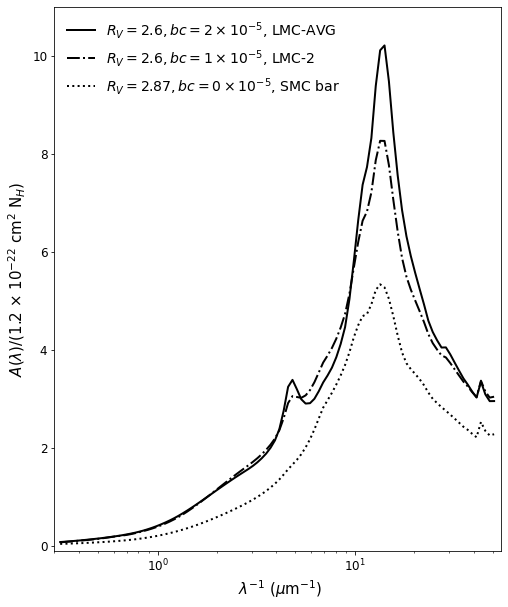

In [ ]:
# Plot extinction curves
plt.figure( figsize=(8,10) )
ax = plt.subplot(111)

ax.plot(lambda_inv, y1, 'k-', lw=2, alpha=1, label=r'$R_V=2.6, bc=2 \times 10^{-5}$, LMC-AVG')
ax.plot(lambda_inv, y2, 'k-.', lw=2, alpha=1, label=r'$R_V=2.6, bc=1 \times 10^{-5}$, LMC-2')
ax.plot(lambda_inv, y3, 'k:', lw=2, alpha=1, label=r'$R_V=2.87, bc=0 \times 10^{-5}$, SMC bar')

# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel(r' $\lambda^{-1}$ ($\mu$m$^{-1}$)', size=15)
ax.set_ylabel(r'$A (\lambda)$/(1.2 $\times$ 10$^{-22}$ cm$^{2}$ N$_H$)', size=15)

plt.legend(loc='upper left', frameon=False, fontsize=14)
# plt.loglog()
plt.xscale('log')
plt.xlim(0.3, 55.)
plt.ylim(-0.1, 11.)
# plt.grid()
plt.show()